<a href="https://colab.research.google.com/github/kezamamio/CpE-AIML/blob/main/58034_Lab05_TrashTakers/58034_Lab05_TrashTakers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic 05.1: Classification
$_{\text{©D.J. Lopez | 2021 | Fundamentals of Machine Learning}}$

Another vital activity of Machine Learning is Classification. In this module we are going to understand the concepts and applications of classification in machine learning. In this module, we are going to discuss:
* Linear Classification
* Logistic Regression

# Laboratory Activity

## Problem 1

* TrashTakers: [Insurance Dataset - Purpose, Needs Statement, and Significance](https://drive.google.com/file/d/1jv9ahJE7y3yEnNk3kCUEQYUulKtHSEgG/view?usp=sharing)


## Problem 2
* TrashTakers Algorithm: [Insurance Dataset - Algorithm](https://drive.google.com/file/d/17PFEd4xYzt0VKIq9qH_Fkkse7y8-Nv_K/view?usp=sharing)

## Solution 

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

In [ ]:
class LogistRegression():

  def train(self, X, y):
    model = LogisticRegression(solver='liblinear', random_state=0).fit(X, y)
  
  def predict(self, X):
    model = LogisticRegression(solver='liblinear', random_state=0).fit(X, y)
    self.preds = model.predict(X)
    return self.preds
    
  ## to indicate the value of m in slope formula
  def coefficients(self, X):
    model = LogisticRegression(solver='liblinear', random_state=0).fit(X, y)
    coefficient = model.coef_
    return coefficient
  
  ## to indicate the value of b in slope formula
  def intercepts(self, X):
    model = LogisticRegression(solver='liblinear', random_state=0).fit(X, y)
    intercept = model.intercept_
    return intercept

  def evaluate(self, X, y):
    preds = self.preds
    residuals = y - preds
    l2_error = np.sqrt(np.sum(np.square(residuals)))
    accuracy = metrics.accuracy_score(y,preds)
    precision = metrics.precision_score(y, preds)
    recall = metrics.recall_score(y,preds)
    F1 = metrics.f1_score(y,preds)
    eval_dict ={'Metrics':['L2 Error', 'Accuracy', 'Precision', 'Recall', 'F1 - Score',],
                'Values':[l2_error,accuracy,precision,recall,F1]
               }
    df = pd.DataFrame(eval_dict)
    return df

  def visualize(self,X,y):
    #scatter plot
    plt.figure(1)
    plt.scatter(X,y, color='red')
    plt.scatter(X,self.preds, color='green')
    plt.grid()

    #heatmap
    plt.figure(2)
    conf_mat = confusion_matrix(y, self.preds)
    sns.heatmap(conf_mat, annot=True)
    
    plt.xlabel("Predicted")
    plt.ylabel("Ground Truth")
    plt.show()

In [ ]:
df = pd.read_csv("/content/insurance_data.csv")
X = df['age'].to_numpy().reshape((-1,1))
y = df['bought_insurance'].to_numpy()

In [ ]:
classification = LogistRegression()

In [ ]:
classification.train(X,y)

In [ ]:
classification.predict(X)

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0])

In [ ]:
classification.coefficients(X)

array([[0.05589224]])

In [ ]:
classification.intercepts(X)

array([-1.80953063])

In [ ]:
classification.evaluate(X,y)

,Metrics,Values
0,L2 Error,1.732051
1,Accuracy,0.888889
2,Precision,0.866667
3,Recall,0.928571
4,F1 - Score,0.896552


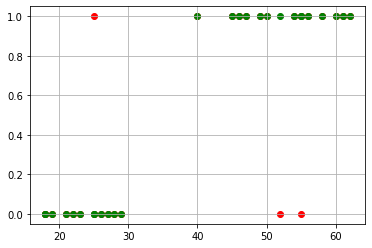

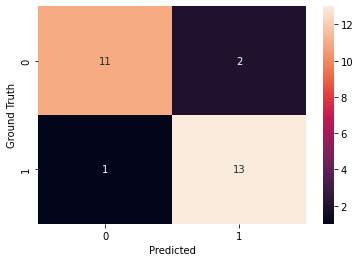

In [ ]:
classification.visualize(X,y)

## Application of the Prediction in the Dataset

In [ ]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def prediction_function(age):
  z = 0.042 * age - 1.81                                                # -1.80953063 ~ -1.81
  y = sigmoid(z)
  return y

In [ ]:
## Youngest age in the dataset
age = 22
prediction_function(age)

0.291935976213014

**0.29 is less than 0.5 which means person with age of 22 will not buy the insurance**

In [ ]:
## Oldest age in the dataset
age = 61
prediction_function(age)

0.6796143329051354

**0.68 is more than 0.5 which means person with age of 61 will buy the insurance**